# Tugas Besar 3 - IF3270 Machine Learning

## Import 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm,datasets,model_selection,metrics,neural_network

from components.FileHandler import FileHandler
from components.ConfusionMatrix import ConfusionMatrix

## Load Dataset Iris

In [2]:
X, y = datasets.load_iris(return_X_y=True)
class_names = datasets.load_iris().target_names
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size=0.1,train_size=0.9)

## Confusion Matrix, Akurasi, Presisi, Recall, F1

In [3]:
yPred = [0,0,1,0,1,0,1,0,0,1]
yTrue = [0,1,1,1,0,1,0,0,1,0]
ConfusionMatrix.execConfusion(yTrue, yPred)

Result
True Positif   : 1
False Positif  : 3
False Negatif  : 4
True Negatif   : 2
Accuracy       : 0.3
Precision      : 0.2
Recall         : 0.2
F1             : 0.2222222222222222

Result (Sklearn)
True Positif   : 1
False Positif  : 3
False Negatif  : 4
True Negatif   : 2
Accuracy       : 0.3
Precision      : 0.25
Recall         : 0.2
F1             : 0.22222222222222224



## FFNN (Kinerja dan Confunsion Matrixnya)

Confusion Matrix: 
 [[5 0 0]
 [0 6 0]
 [0 0 4]]
X Test: 
 [[5.  3.5 1.6 0.6]
 [4.9 3.6 1.4 0.1]
 [6.3 3.3 6.  2.5]
 [5.1 2.5 3.  1.1]
 [5.8 4.  1.2 0.2]
 [5.5 2.5 4.  1.3]
 [7.  3.2 4.7 1.4]
 [6.2 2.2 4.5 1.5]
 [5.4 3.9 1.7 0.4]
 [6.9 3.1 5.4 2.1]
 [5.5 3.5 1.3 0.2]
 [7.3 2.9 6.3 1.8]
 [6.2 2.9 4.3 1.3]
 [6.2 3.4 5.4 2.3]
 [5.8 2.7 4.1 1. ]]
Y Test: 
 [0 0 2 1 0 1 1 1 0 2 0 2 1 2 1]

Accuracy        : 1.0
Macro Precision : 1.0
Macro Recall    : 1.0
Macro F1-score  : 1.0


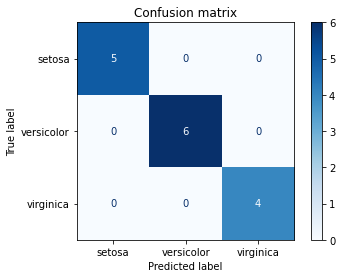

In [9]:
classifier = svm.SVC(kernel='linear', C=0.01).fit(X_train, y_train)
y_pred = classifier.predict(X_test)
np.set_printoptions(precision=2)
title = "Confusion matrix"

disp = metrics.ConfusionMatrixDisplay.from_estimator(
       classifier, X_test, y_test,
       display_labels = class_names,
       cmap = plt.cm.Blues,
       normalize = None
       )
disp.ax_.set_title(title)

print("Confusion Matrix: \n", disp.confusion_matrix)
print("X Test: \n", X_test)
print("Y Test: \n", y_test)
print()
print(f"Accuracy        : {metrics.accuracy_score(y_test, y_pred)}")
print(f"Macro Precision : {metrics.precision_score(y_test, y_pred, average='macro')}")
print(f"Macro Recall    : {metrics.recall_score(y_test, y_pred, average='macro')}")
print(f"Macro F1-score  : {metrics.f1_score(y_test, y_pred, average='macro')}")
plt.show()



## FFNN 10-Fold

In [5]:
def kFoldCrossValidation(k) :
    kf = model_selection.KFold(n_splits=k)
    clf = neural_network.MLPClassifier(hidden_layer_sizes=(13,13,13),max_iter=10000)
    for train_index,test_index in kf.split(X):
        clf.fit(X[train_index], y[train_index])

    print("accuracy ",str(metrics.accuracy_score(y_test,clf.predict(X_test))))
    print("precision ",str(metrics.precision_score(y_test,clf.predict(X_test),average='macro',zero_division=1)))
    print("recall ",str(metrics.recall_score(y_test,clf.predict(X_test),average='macro',zero_division=1)))
    print("f1 ",str(metrics.f1_score(y_test,clf.predict(X_test),average='macro',zero_division=1)))
    print("Confused Matrix")
    print(metrics.confusion_matrix(y_test,clf.predict(X_test)))

kFoldCrossValidation(10)


accuracy  1.0
precision  1.0
recall  1.0
f1  1.0
Confused Matrix
[[5 0 0]
 [0 6 0]
 [0 0 4]]


## FILE SAVE

In [6]:
FileHandler.saveModel(classifier)

## FILE OPEN/LOAD

In [7]:
loaded_model = FileHandler.loadModel()

## Model

In [8]:
new_inst_X = [[5.0, 2.0, 4.0, 1.0]]
new_inst_Y = [2]
def printModel(inst_x, inst_y, loaded_model) :
    inst_y_pred = loaded_model.predict(inst_x)
    print("accuracy ", str(metrics.accuracy_score(inst_y, inst_y_pred)))
    print("precision ", str(metrics.precision_score(inst_y, inst_y_pred, average='macro', zero_division=1)))
    print("recall ", str(metrics.recall_score(inst_y, inst_y_pred, average='macro', zero_division=1)))
    print("f1 ", str(metrics.f1_score(inst_y, inst_y_pred, average='macro', zero_division=1)))
    print("Confused Matrix")
    print(metrics.confusion_matrix(inst_y, inst_y_pred))

printModel(new_inst_X, new_inst_Y, loaded_model)

accuracy  0.0
precision  0.5
recall  0.5
f1  0.0
Confused Matrix
[[0 0]
 [1 0]]


## Analisis
- Berdasarkan implementasikan kami, perbandingan F1-score dan accuracy implementasi dengan skearn hampir sama, hal ini menyatakan bahwa implementasi sudah sesuai dengan sklearn.
- Kinerja FFNN beserta confunsion matriks hasil implementasi kami memiliki nilai precision yang sama dengan nilai accuracy, maka implementasi telah sesuai dengan nilai yang sebenarnya

## Anggota Kelompok
- 13519001 - Karlsen Adiyasa Bachtiar
- 13519051 - Yudi Alfayat
- 13519066 - Almeiza Arvin Muzaki
- 13519068 - Roy H Simbolon